In [16]:
%matplotlib inline

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, cross_validation, preprocessing

from assistments_workbench.models.model import classification_model

In [18]:
pylab.rcParams['figure.figsize'] = 9, 6
pylab.rcParams['font.size'] = 14

In [19]:
k = 5

In [20]:
input_data = pd.read_csv('../data/algebra.csv')

In [21]:
input_data.describe()

,skill_id,correct,per_corr,per_incorr,difficulty
count,607025.000000,607025.000000,607025.000000,607025.000000,607025.000000
mean,48.066729,0.755288,36.674213,9.651421,0.244712
std,48.349030,0.429916,53.338152,15.906151,0.082409
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,4.000000,1.000000,0.186122
50%,36.000000,1.000000,15.000000,4.000000,0.235275
75%,56.000000,1.000000,47.000000,11.000000,0.286801
max,436.000000,1.000000,480.000000,175.000000,1.000000


In [22]:
input_data.head()

,skill_id,correct,per_corr,per_incorr,difficulty
0,1,0,0,0,0.432432
1,2,1,0,0,0.432432
2,3,0,0,0,0.284582
3,4,1,0,0,0.284582
4,5,1,0,0,0.284582


In [23]:
# mean of correctness
np.mean(input_data['correct'])

0.7552884971788641

In [24]:
# mean of probelm difficulty
np.mean(input_data['difficulty'])

0.24471150283748283

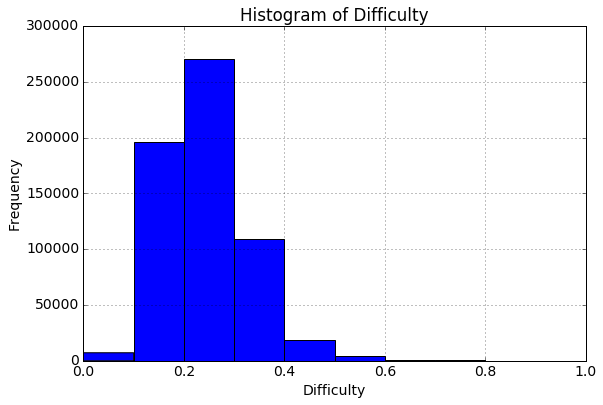

In [25]:
# hisogtam of difficulty
input_data['difficulty'].hist()
plt.title('Histogram of Difficulty')
plt.xlabel('Difficulty')
plt.ylabel('Frequency')

In [26]:
# input_data['opp_count'] = input_data['per_corr'] + input_data['per_incorr']

In [27]:
# pd.crosstab(input_data['opp_count'][:100], input_data['correct'][:100].astype(bool)).plot(kind='bar')
# plt.title('Num of pervious opportunities by by correctness')
# plt.xlabel('Num of pervious opportunity ')
# plt.ylabel('Frequency')

In [28]:
all_features = input_data.columns.tolist()
print all_features

['skill_id', 'correct', 'per_corr', 'per_incorr', 'difficulty']


In [29]:
label = 'correct'
all_features.remove(label)
predictors = all_features
categorical_features = ['skill_id']

In [30]:
model = LogisticRegression()
classification_model(model, input_data, predictors, label, categorical_features, k)

Predictors: ['skill_id', 'per_corr', 'per_incorr', 'difficulty']
auc: 0.766183992616
r2: 0.185525692079
rmse: 0.387931459996
accuracy: 0.786995593262
